In [1]:
import tensorflow as tf
import os
import pickle
import numpy as np
import time
import matplotlib.pyplot as plt

# Plot configurations
%matplotlib inline



In [2]:
import pickle
import os
import tarfile
import urllib.request as url
import numpy as np

def unpickle(file):
    with open(file, 'rb') as fo:
        res = pickle.load(fo, encoding='bytes')
    return res
        
def load_data():
    os.chdir('./')
    meta = unpickle('./data/cifar-100-python/meta')
    coarse_label_names = [t.decode('utf8') for t in meta[b'coarse_label_names']]

    train = unpickle('./data/cifar-100-python//train')
    y_train = np.array(train[b'coarse_labels'])
    X_train = np.array(train[b'data'])

    test = unpickle('./data/cifar-100-python//test')
    y_test = np.array(test[b'coarse_labels'])
    X_test = np.array(test[b'data'])
    
    return coarse_label_names, X_train, y_train, X_test, y_test



['aquatic_mammals', 'fish', 'flowers', 'food_containers', 'fruit_and_vegetables', 'household_electrical_devices', 'household_furniture', 'insects', 'large_carnivores', 'large_man-made_outdoor_things', 'large_natural_outdoor_scenes', 'large_omnivores_and_herbivores', 'medium_mammals', 'non-insect_invertebrates', 'people', 'reptiles', 'small_mammals', 'trees', 'vehicles_1', 'vehicles_2']
(50000, 32, 32, 3)


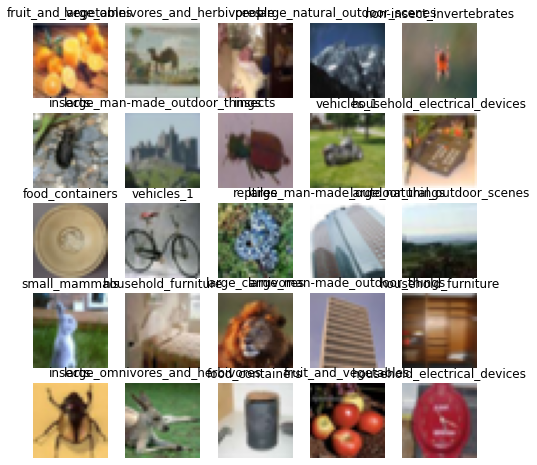

In [4]:
# Load the raw CIFAR-100 data. 
label_map, X_train, y_train, X_test, y_test = load_data()

# I flattened 1×32×32×3 images into 1×3072 Numpy arrays. Number 3 stands for 3 color channels.
# reshape vectorized data into the image format
X = X_train.reshape(50000, 3, 32, 32).transpose(0,2,3,1)

print(label_map)
print(X.shape)

#Visualizing CIFAR 100 data. Randomly choose 25 images from the train dataset to show.
fig, axes1 = plt.subplots(5,5,figsize=(8,8))
for j in range(5):
    for k in range(5):
        i = np.random.choice(range(len(X)))
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(X[i:i+1][0])
        axes1[j][k].set_title(label_map[y_train[i]])

In [6]:
#    Train data: 49,000 samples from the original train set: indices 1~49,000
#    Validation data: 1,000 samples from the original train set: indices 49,000~50,000
#    Test data: 1,000 samples from the original test set: indices 1~1,000
num_training = 49000
num_validation = 1000
num_test = 1000

X_val = X_train[-num_validation:, :]
y_val = y_train[-num_validation:]


X_train = X_train[:num_training, :]
y_train = y_train[:num_training]

X_test = X_test[:num_test, :]
y_test = y_test[:num_test]


# Subsample 10-class training set to 2-class training set
X_train_binary = X_train[y_train<2,:]
num_training_binary = X_train_binary.shape[0]
y_train_binary = y_train[y_train<2]

X_val_binary = X_val[y_val<2,:]
y_val_binary = y_val[y_val<2]


print('Train data (binary) shape: ', X_train_binary.shape)
print('Train labels (binary) shape: ', y_train_binary.shape)
print('Validation data (binary) shape: ', X_val_binary.shape)
print('Validation labels (binary) shape: ', y_val_binary.shape)


# Preprocessing: subtract the mean value across every dimension, for binary training data
mean_image = np.mean(X_train_binary, axis=0)

X_train_binary = X_train_binary.astype(np.float32) - mean_image.astype(np.float32)
X_val_binary = X_val_binary.astype(np.float32) - mean_image

X_train_binary = np.hstack([X_train_binary, np.ones((X_train_binary.shape[0], 1))])
X_val_binary = np.hstack([X_val_binary, np.ones((X_val_binary.shape[0], 1))])
print(X_train_binary.shape, X_val_binary.shape)

Train data (binary) shape:  (4910, 3072)
Train labels (binary) shape:  (4910,)
Validation data (binary) shape:  (101, 3072)
Validation labels (binary) shape:  (101,)
(4910, 3073) (101, 3073)


### Task 1 : Implement a Decision Tree Classifier for your classification problem. You may use a built-in package to implement your classifier. Try modifying one or more of the input parameters and describe what changes you notice in your results. Clearly describe how these factors are affecting your output.

[[2315  145]
 [ 471 1979]]
[[2315  145]
 [ 471 1979]]


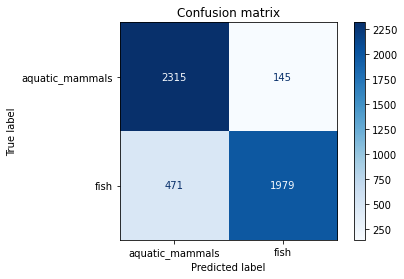

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix

classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10, random_state = 0)
classifier.fit(X_train_binary, y_train_binary)

y_train_pred = classifier.predict(X_train_binary)
cm = confusion_matrix(y_train_binary, y_train_pred)
print(cm)

class_names = ['aquatic_mammals', 'fish']
disp = plot_confusion_matrix(classifier, X_train_binary, y_train_binary,
                             display_labels=class_names,
                             cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion matrix")

print(disp.confusion_matrix)

plt.show()

#### Clearly when you increase the complexity of the decision tree, you can see the significant reduction of the classification error. Normally the decision tree's complexity has a crucial effect on its accuracy and it is explicitly controlled by the stopping criteria used and the pruning method employed. Usually, the tree complexity is measured by one of the following metrics: the total number of nodes, total number of leaves, tree depth and number of attributes used. In Sklearn, max_depth, min_samples_split, and min_samples_leaf are all stopping criteria whereas min_weight_fraction_leaf and min_impurity_decrease are pruning methods.

[[2455    5]
 [   3 2447]]
[[2455    5]
 [   3 2447]]


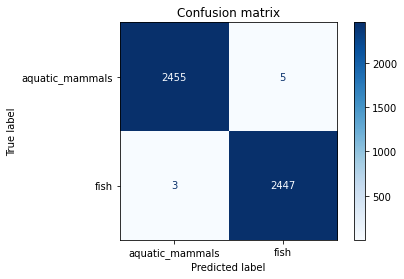

In [19]:
classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth = 20, random_state = 0)
classifier.fit(X_train_binary, y_train_binary)

y_train_pred = classifier.predict(X_train_binary)
cm = confusion_matrix(y_train_binary, y_train_pred)
print(cm)

class_names = ['aquatic_mammals', 'fish']
disp = plot_confusion_matrix(classifier, X_train_binary, y_train_binary,
                             display_labels=class_names,
                             cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion matrix")

print(disp.confusion_matrix)

plt.show()

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_val_binary)
cm = confusion_matrix(y_val_binary, y_pred)
print(cm)
accuracy_score(y_val_binary, y_pred)

[[48  0]
 [ 0 53]]


1.0

### Task 2 : From the Bagging and Boosting methods pick any one algorithm from each category. Implement both the algorithms using the same data. Use k-fold cross validation to find the effectiveness of both the models. Comment on the difference/similarity of the results.

[[2446   14]
 [  45 2405]]
[[2446   14]
 [  45 2405]]


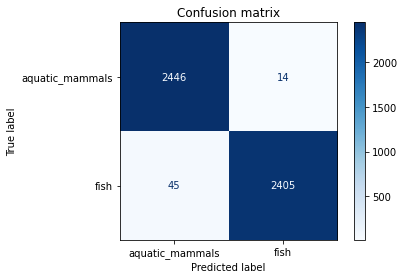

In [22]:
from sklearn.ensemble import BaggingClassifier

classifier_Bag = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=0)
classifier_Bag.fit(X_train_binary, y_train_binary)

y_train_pred = classifier_Bag.predict(X_train_binary)
cm = confusion_matrix(y_train_binary, y_train_pred)
print(cm)

class_names = ['aquatic_mammals', 'fish']
disp = plot_confusion_matrix(classifier_Bag, X_train_binary, y_train_binary,
                             display_labels=class_names,
                             cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion matrix")

print(disp.confusion_matrix)

plt.show()

[[1976  484]
 [ 621 1829]]
[[1976  484]
 [ 621 1829]]


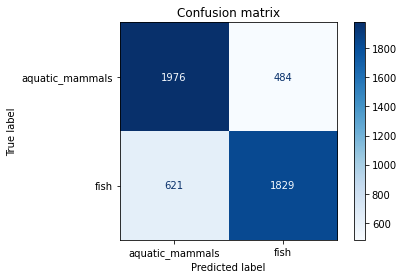

In [27]:
from sklearn.ensemble import GradientBoostingClassifier

classifier_Boost = GradientBoostingClassifier(n_estimators=10, learning_rate=0.5, random_state=0)
classifier_Boost.fit(X_train_binary, y_train_binary)

y_train_pred = classifier_Boost.predict(X_train_binary)
cm = confusion_matrix(y_train_binary, y_train_pred)
print(cm)

class_names = ['aquatic_mammals', 'fish']
disp = plot_confusion_matrix(classifier_Boost, X_train_binary, y_train_binary,
                             display_labels=class_names,
                             cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion matrix")

print(disp.confusion_matrix)

plt.show()

In [29]:
from sklearn.model_selection import KFold 
from sklearn.metrics import accuracy_score
 
#k-fold cross validation
k = 5
kf = KFold(n_splits=k, random_state=None)

classifier_Bag = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=0)
classifier_Boost = GradientBoostingClassifier(n_estimators=10, learning_rate=0.5, random_state=0)
 
acc_score_bag = []
acc_score_Boost = []


for train_index , test_index in kf.split(X_train_binary):
    
    X_train , X_test = X_train_binary[train_index],X_train_binary[test_index]
    y_train , y_test = y_train_binary[train_index] , y_train_binary[test_index]
     
    classifier_Bag.fit(X_train,y_train)
    classifier_Boost.fit(X_train,y_train)
    
    pred_values_bag = classifier_Bag.predict(X_test)
    pred_values_boost = classifier_Boost.predict(X_test)
    
    acc_score_bag.append(accuracy_score(pred_values_bag , y_test))
    acc_score_Boost.append(accuracy_score(pred_values_boost , y_test))

avg_acc_bag_score = sum(acc_score_bag)/k
avg_acc_boost_score = sum(acc_score_Boost)/k

print('accuracy of each fold for Bagging- {}'.format(acc_score_bag))
print('accuracy of each fold for Boosting- {}'.format(acc_score_Boost))

print('Avg accuracy for Bagging: {}'.format(avg_acc_bag_score))
print('Avg accuracy for Boosting: {}'.format(avg_acc_boost_score))

accuracy of each fold for Bagging- [0.7067209775967414, 0.7169042769857433, 0.7036659877800407, 0.7077393075356415, 0.730142566191446]
accuracy of each fold for Boosting- [0.7138492871690427, 0.7138492871690427, 0.7118126272912424, 0.6914460285132383, 0.7057026476578412]
Avg accuracy for Bagging: 0.7130346232179227
Avg accuracy for Boosting: 0.7073319755600815


#### In general, bagging and boosting decrease the variance of single estimate as they combine several estimates from different models. They produce a model with higher stability. Usually bagging helps to decrease the model’s variance, whereas boosting helps to decrease the model’s bias. For this specific CIFAR-100 subclass binary classification problem the classification accuracy for bagging and boosting are not differed by too much

### Task 3 : Compare the effectiveness of the three models implemented above. Clearly describe the metric you are using for comparison. Describe (with examples) Why is this metric(metrics) suited/appropriate for the problem at hand? How would a choice of a different metric impact your results? Can you demonstrate that?

In [30]:
from sklearn.model_selection import KFold 
from sklearn.metrics import accuracy_score
 
#k-fold cross validation
k = 5
kf = KFold(n_splits=k, random_state=None)

classifier_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 20, random_state = 0)
classifier_Bag = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=0)
classifier_Boost = GradientBoostingClassifier(n_estimators=10, learning_rate=0.5, random_state=0)
 
acc_tree = []
acc_score_bag = []
acc_score_Boost = []


for train_index , test_index in kf.split(X_train_binary):
    
    X_train , X_test = X_train_binary[train_index],X_train_binary[test_index]
    y_train , y_test = y_train_binary[train_index] , y_train_binary[test_index]
     
    classifier_tree.fit(X_train,y_train)
    classifier_Bag.fit(X_train,y_train)
    classifier_Boost.fit(X_train,y_train)
    
    pred_value_tree = classifier_tree.predict(X_test)
    pred_values_bag = classifier_Bag.predict(X_test)
    pred_values_boost = classifier_Boost.predict(X_test)
    
    acc_tree.append(accuracy_score(pred_value_tree, y_test))
    acc_score_bag.append(accuracy_score(pred_values_bag, y_test))
    acc_score_Boost.append(accuracy_score(pred_values_boost, y_test))

acc_tree_score = sum(acc_tree)/k
avg_acc_bag_score = sum(acc_score_bag)/k
avg_acc_boost_score = sum(acc_score_Boost)/k

print('accuracy of each fold for vanilla tree classifier- {}'.format(acc_tree))
print('accuracy of each fold for Bagging- {}'.format(acc_score_bag))
print('accuracy of each fold for Boosting- {}'.format(acc_score_Boost))

print('Avg accuracy for vanilla tree classifier: {}'.format(acc_tree_score))
print('Avg accuracy for Bagging: {}'.format(avg_acc_bag_score))
print('Avg accuracy for Boosting: {}'.format(avg_acc_boost_score))

accuracy of each fold for vanilla tree classifier- [0.6374745417515275, 0.6456211812627292, 0.6425661914460286, 0.639511201629328, 0.6323828920570265]
accuracy of each fold for Bagging- [0.7067209775967414, 0.7169042769857433, 0.7036659877800407, 0.7077393075356415, 0.730142566191446]
accuracy of each fold for Boosting- [0.7138492871690427, 0.7138492871690427, 0.7118126272912424, 0.6914460285132383, 0.7057026476578412]
Avg accuracy for vanilla tree classifier: 0.6395112016293278
Avg accuracy for Bagging: 0.7130346232179227
Avg accuracy for Boosting: 0.7073319755600815


### Comparison
#### We can see bagging and boosing helps to increase the accuracy for the classification results. In this setting I am using accuracy metric based on confusion matrix to measure the performance of different classifiers.

### Why Accuracy metric?
#### When performing classification predictions, there are four types of outcomes that could occur:True Positive/True Negative/False Positive/False Negative, and these four outcomes can be plotted on a confusion matrix. We want our model to focus on True positive and True Negative. Accuracy is one metric which gives the fraction of predictions our model got right. It is usually defined as:

#### Accuracy = Number of correct predictions(TP + TN) / Total number of predictions(TP + FP + FN + TP).

#### We can certainly use some more advanced metric like F-1 Score or ROC/AUC Curve which is calculated from the precision and recall of the test, where the precision is the number of TP results divided by the number of all positive(TP+FP) results, and the recall is the number of true positive results divided by the number of all samples that should have been identified as positive. These metric helps because they are focusing on calculating the harmonic mean, meaning that it is not so sensitive to extremely large values, unlike simple average metric.